# Assignment 03: Neural Networks and Curve Fitting

## Wyatt Smith

### Phys. 494

### 03/23/2021

### 1) Backpropagation

Recall:

$$a_j^\ell = f(z_j^\ell)$$

where $f$ is the activation function and 

$$z_j^\ell - \sum_{k}a_k^{\ell-1}w_{kj}^\ell + b_j^\ell,$$

and the cost is given by 

$$\mathscr{C} = \frac{1}{2|\mathcal{D}|}\sum_{{\bf x}\in \mathcal{D}}C({\bf x})=\frac{1}{2} \big \langle |a^L({\bf x}) - y({\bf x})|^2 \big \rangle.$$

Define the error of the $j$th neuron in the $L$th layer as 

$$\Delta_j^\ell := \frac{\partial C}{\partial z_j^\ell}.$$ 

Then,

#### (a) $\Delta_j^L = \frac{\partial C}{\partial a_j^L}f^\prime(z_j^L)$, and $\Delta_j^\ell = \sum_k \Delta_k^{\ell+1}\big [{w^{l+1}}^T \big]_{kj}f^\prime(z_j^\ell)$ where $\ell < L$.

For the First equation, 

$$\frac{\partial }{\partial z_j^:}a_j^L  = f^\prime(z_j^L),$$

so it follows that

$$\Delta_j^L = \frac{\partial C}{\partial z_j^L}\frac{\partial z_j^L}{\partial a_j^L}f^\prime(z_j^L)= \frac{\partial C}{\partial a_j^L}f^\prime(z_j^L).$$

The first is just a direct application of the chain rule. Specifically, the error is a function of the layer $\ell$ neurons via the next layer, we can conclude that 

$$\Delta_j^L := 
\frac{\partial C}{\partial z_j^\ell} = \sum_k \frac{\partial C}{ \partial z_k^{\ell+1}} \frac{\partial z_k^{\ell+1}}{z_j^\ell}.$$

However, if we recall the definition of $\Delta$, the first factor can be simplified to yield: 

$$\Delta_j^L = \sum_k \Delta^{\ell+1}_k \frac{\partial z_k^{\ell+1}}{\partial z_j^\ell}$$

so (and here is where the chain rule factors in)

$$\Delta_j^\ell = \sum_k \Delta_k^{\ell+1}\big [{w^{l+1}}^T \big]_{kj}f^\prime(z_j^\ell).$$

#### (b) The partial of the cost function w.r.t the weights and biases is as follows: 

We do the same trick employed multiple times above and invoke the definition of $\Delta$. In particular 

$$\frac{\partial C}{\partial w_{ij}^\ell} = \frac{\partial C}{\partial z_{i}^\ell}\frac{\partial z_{i}^\ell}{\partial w_{ij}^\ell} = a_i^{\ell-1}\frac{\partial C}{\partial z_j^\ell} = a_i^{\ell-1} \Delta_j^\ell.$$

Note the change in indices. 

Similarly, 

$$\frac{\partial C}{\partial b_j^\ell} = \frac{\partial C}{\partial z_j^\ell}\frac{\partial b_j^\ell}{\partial z_j^\ell},$$

but $\frac{\partial b_j^\ell}{\partial z_j^\ell} = 1$, so 

$$\frac{\partial C}{\partial b_j^\ell} = \frac{\partial C}{\partial z_j^\ell} := \Delta_j^\ell.$$

### 2) Backprop. for $f(z) = z$

Here we have both that $a_j^\ell = z_j^\ell$ and that $f^\prime(z_j^\ell) = 1$. 

This allows us to bypass much of the intermediate calculations and compute the gradient of the cost right away. Specifically

$$\Delta_j^\ell := \frac{\partial C}{\partial z_j^\ell} = \frac{\partial C}{\partial a_j^\ell}$$

so 

$$\frac{\partial C}{\partial w_{ij}^\ell}= a_i^{\ell-1} \frac{\partial C}{\partial a_j^\ell} = z_i^{\ell-1} \frac{\partial C}{\partial z_j^\ell}$$

and 

$$\frac{\partial C}{\partial b_j^\ell} = \Delta_j^\ell = \frac{\partial C}{\partial z_j^\ell} = \frac{\partial C}{\partial a_j^\ell}.$$

This greatly simplifies the calculations. 

### 3) Analyzing Neuron Output

#### a) Load the image

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(linewidth=120)

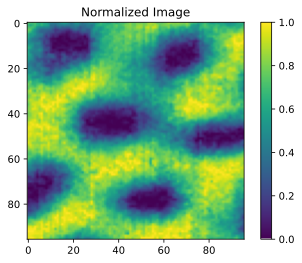

In [53]:
#first, we write a func to normalize the image. 
def pnorm(X):
    n, d = X-X.min(axis = 0),X.max(axis = 0) - X.min(axis = 0)
    d[d==0] = 1
    return n/d

plt.imread("./data1/mcm41_reduced.png")
image = plt.imread("./data1/mcm41_reduced.png")
norm_image = pnorm(image)
plt.imshow(norm_image)
plt.colorbar()
plt.title("Normalized Image")
plt.show()


#### b) Creating a Target function:

I am not sure why it is this way, it has something to do with the way the image is indexed no doubt, but we transpose the indices at the end and take (1-y) along the y axis. I found this by trial and error. Note the different type cases. 

This method is very crude.

In [54]:
def target(x,y):
    x = np.asarray(x)
    y = np.asarray(y)
    i = np.floor((x)*95-0).astype(int)
    j = np.floor((1-y)*95-0).astype(int)
    #print(i,j)
    return norm_image[j,i]

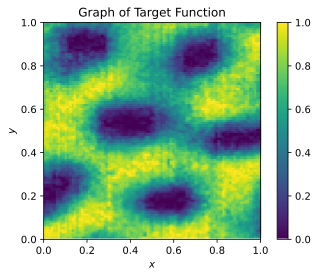

In [55]:
grid_size = 960

# The domain over which you want to plot [xmin,xmax,ymin,ymax]
extent = [0, 1.0, 0, 1.0]

X = np.meshgrid(np.linspace(extent[0],extent[1],grid_size),np.linspace(extent[2],extent[3],grid_size))
batch_size = grid_size**2

aₒ = np.zeros([batch_size,2])
aₒ[:,0] = X[0].flatten()
aₒ[:,1] = X[1].flatten()

# Evaluate your function here
# note that *X unpacks the list (https://docs.python.org/3.7/tutorial/controlflow.html#unpacking-argument-lists)
result = target(*X)

plt.imshow(result,rasterized=True, extent=extent,
           interpolation='nearest', origin='lower')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.colorbar()
plt.title("Graph of Target Function")
plt.show()

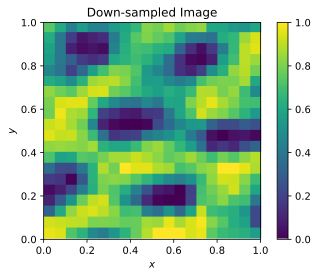

In [56]:
grid_size = 20

# The domain over which you want to plot [xmin,xmax,ymin,ymax]
extent = [0, 1.0, 0, 1.0]

X = np.meshgrid(np.linspace(extent[0],extent[1],grid_size),np.linspace(extent[2],extent[3],grid_size))
batch_size = grid_size**2

aₒ = np.zeros([batch_size,2])
aₒ[:,0] = X[0].flatten()
aₒ[:,1] = X[1].flatten()

# Evaluate your function here
# note that *X unpacks the list (https://docs.python.org/3.7/tutorial/controlflow.html#unpacking-argument-lists)
result = target(*X)

plt.imshow(result,rasterized=True, extent=extent,
           interpolation='nearest', origin='lower')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');
plt.colorbar()
plt.title("Down-sampled Image")
plt.show()

#### c) Train the Neural Network

In [57]:
def feed_forward(aₒ,w,b):
    '''Propagate an input vector x = aₒ through 
       a network with weights (w) and biases (b).
       Return: activations (a) and derivatives f'(z).'''
    
    a,df = [aₒ],[]
    for wℓ,bℓ in zip(w,b):
        zℓ = np.dot(a[-1],wℓ) + bℓ
        _a,_df = ffprime(zℓ)
        a.append(_a)
        df.append(_df)
        
    return a,df

def backpropagation(y,a,w,b,df): 
    '''Inputs: results of a forward pass
       Targets     y: dim(y)  = batch_size ⨯ nL
       Activations a: dim(a)  = L ⨯ batch_size ⨯ nℓ
       Weights     w: dim(w)  = L-1 ⨯ nℓ₋₁ ⨯ nℓ
       Biases      b: dim(b)  = L-1 ⨯ nℓ
       f'(z)      df: dim(df) = L-1 ⨯ batch_size ⨯ nℓ
       
       Outputs: returns mini-batch averaged gradients of the cost function w.r.t. w and b
       dC_dw: dim(dC_dw) = dim(w)
       dC_db: dim(dC_db) = dim(b)
    '''
    
    num_layers = len(w)
    L = num_layers-1        
    batch_size = len(y)
    
    # initialize empty lists to store the derivatives of the cost functions
    dC_dw = [None]*num_layers
    dC_db = [None]*num_layers
    Δ = [None]*num_layers
    
    # perform the backpropagation
    for ℓ in reversed(range(num_layers)):
        
        # treat the last layer differently
        if ℓ == L:
            Δ[ℓ] = (a[ℓ] - y)*df[ℓ]
        else: 
            Δ[ℓ] = (Δ[ℓ+1] @ w[ℓ+1].T) * df[ℓ]
            
        dC_dw[ℓ] = (a[ℓ-1].T @ Δ[ℓ]) / batch_size
        dC_db[ℓ] = np.average(Δ[ℓ],axis=0)
        
    return dC_dw,dC_db

def gradient_step(η,w,b,dC_dw,dC_db):
    '''Update the weights and biases as per gradient descent.'''
    
    for ℓ in range(len(w)):
        w[ℓ] -= η*dC_dw[ℓ]
        b[ℓ] -= η*dC_db[ℓ]
    return w,b

def train_network(x,y,w,b,η):
    '''Train a deep neural network via feed forward and back propagation.
       Inputs:
       Input         x: dim(x) = batch_size ⨯ n₁
       Target        y: dim(y) = batch_size ⨯ nL
       Weights       w: dim(w)  = L-1 ⨯ nℓ₋₁ ⨯ nℓ
       Biases        b: dim(b)  = L-1 ⨯ nℓ
       Learning rate η
       
       Outputs: the least squared cost between the network output and the targets.
       '''
    
    a,df = feed_forward(x,w,b)
    
    # we pass a cycled a by 1 layer for ease of indexing
    dC_dw,dC_db = backpropagation(y,a[1:]+[a[0]],w,b,df)
    
    w,b = gradient_step(η,w,b,dC_dw,dC_db)
    
    return 0.5*np.average((y-a[-1])**2)

def make_batch(n,batch_size,extent,func):
    '''Create a mini-batch from our inputs and outputs.
    Inputs:
    n0        : number of neurons in each layer
    batch_size: the desired number of samples in the mini-batch
    extent    : [min(xₒ),max(xₒ), min(x₁),max(x₁),…,min(x_{n[0]-1}),max(x_{n[0]-1})]
    func:     : the desired target function.
    
    Outputs: returns the desired mini-batch of inputs and targets.
    '''
    
    x = np.zeros([batch_size,n[0]])
    for i in range(n[0]):
        x[:,i] = np.random.uniform(low=extent[2*i],high=extent[2*i+1],size=[batch_size])

    y = func(*[x[:,j] for j in range(n[0])]).reshape(-1,n[-1])
    
    return x,y 

In [58]:
n = [2,200,100,50, 1]
w,b = [],[]
for ℓ in range(len(n)-1):
    w.append(np.random.uniform(low=-10,high=10,size=(n[ℓ],n[ℓ+1])))
    b.append(np.random.uniform(low=-11,high=11, size=n[ℓ+1]))

In [59]:
def ffprime(z): 
    '''calculate f(z) and f'(z); sigmoid.'''
    _f = 1.0/(1.0+np.exp(-z))
    return _f,np.exp(-z)*(_f**2)

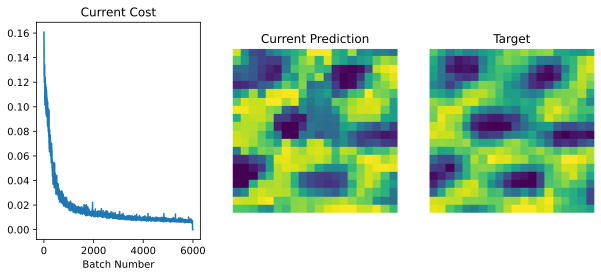

In [ ]:
from IPython.display import clear_output,display
from time import sleep
η = .6

batch_size = 550
num_steps = 6000
plot_ratio = int(num_steps/300)

costs = np.zeros(num_steps)
for j in range(num_steps):
    
    x,y = make_batch(n,batch_size,extent,target)
    costs[j] = train_network(x,y,w,b,η)
    
    # we plot every plot_ratio steps
    if not j % plot_ratio or j == num_steps-1:
        
        clear_output(wait=True)
        ret = feed_forward(aₒ,w,b)
        aL = ret[0][-1].reshape(grid_size,grid_size)
        fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(10,4))
        
        ax[1].axis('off')
        img = ax[1].imshow(aL, extent=extent, rasterized=True, 
               interpolation='nearest', origin='lower', aspect='equal',vmin=0, vmax=1)
        
        ax[2].axis('off')
        ax[2].imshow(target(*X), extent=extent, rasterized=True, 
           interpolation='nearest', origin='lower', aspect='equal',vmin=0, vmax=1)

        ax[0].plot(costs)

        ax[0].set_title("Current Cost")
        ax[0].set_xlabel("Batch Number")
        ax[1].set_title("Current Prediction")
        ax[2].set_title("Target")

        plt.show()

In [61]:
import json

data={
    "topology": n ,
    "num_steps": num_steps ,
    "eta": float(η) ,
    "batch size ": batch_size 
}

out_file = open("image_optimal.json", "w")
json.dump(data, out_file, indent=1)

There were a few strong local minimia that had to be avoided, but I was able to get the cost down to a fraction of a percent with these parameters. It reliably would converge on a good looking picturethat was, if anything, to "vibrant". I hypothesize that this could be corrected by using a different sigmoid function, one that is less "dramatic," like a relu function. I did not experiment on this front due to time allocation, however. 

### 4) Lorentzian vs Gaussian 

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime

#### (a). Generate the dataset

First, we define our functions and plot them with $\sigma, A = 1$ and $\mu = 0$ as a "sanity check" per-se. The Gaussian should give a familar shape if we plot 3 std. deviations, and the Lorentzian should should look similar but  

In [45]:
def L(x,A,μ,σ):
    return A/((x-μ)**2/(σ**2)+1)

def N(x,A,μ,σ):
    return A*np.exp(-(x-μ)**2/(2*σ**2))

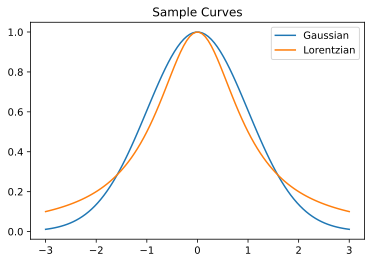

In [46]:
X = np.linspace(-3,3,100)

poo = N(X,1,0,1)
foo = L(X,1,0,1)
plt.plot(X,poo, label= "Gaussian")
plt.plot(X,foo, label = "Lorentzian")
plt.legend()
plt.title("Sample Curves")
plt.show()

With this working, we generate our large dataset of curves on the interval $x \in [-5,5]$ with $5000$ datapoints therein. 

We get this by picking a random value for $A, \sigma \in [0,1]$, $\mu \in [-3,3]$ and "flipping a coin" to choose if we make a Lorentzian or a Gaussian.

We will assign `1` to a Gaussian and a `0` to a Lorentzian. 

In [47]:
X = np.linspace(-5,5,5000)

def random_curve():
    A = np.random.uniform(0,1)
    σ = np.random.uniform(0,1)
    μ = np.random.uniform(-3,3)
    coin = np.random.randint(0,2)
    if(coin == 0):
        return N(X,A,μ,σ), 1
    else:
        return L(X,A,μ,σ), 0

Here, we will make 10 data points and plot them to see how it looks. 

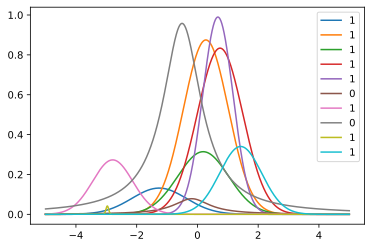

In [48]:
data = []

for i in range(0,10):
    data.append(random_curve())
    
for c in data:
    plt.plot(X,c[0], label=c[1])

plt.legend()
plt.show()

To generalize this, we will make a function to generate a dataset of curves. Before doing this, I will make a new function for generating the curve which instead returns a vector containing the image of $X$ followed by the label (as a float), rather than returning the two as a couple. This is less intuitive, but makes it easier to parse the data later on. 

In [49]:
#np.clear(data)
def random_curve2():
    A = np.random.uniform(0,1)
    σ = np.random.uniform(0,1)
    μ = np.random.uniform(-3,3)
    coin = np.random.randint(0,2)
    yvals = []
    if(coin == 0):
        yvals = N(X,A,μ,σ)
        Y = np.append(yvals, 1.0)
        return Y
    else:
        yvals = L(X,A,μ,σ)
        Y = np.append(yvals, 0.0)
        return Y

def make_data(N):
    dat = np.empty((N,len(X)+1))
    for i in range(0,N):
        dat[i] = random_curve2()   
    return dat

#### (b) Training a Neural Network

First, we generate a large dataset:


In [314]:
Num = 10**5 ## I called the Gaussian function "N"... perhaps this was misguided.

data = make_data(Num)

images = data[:,:-1].astype(dtype=float)
labels = data[:,-1].astype(dtype=float)

Now, the usual procedure: 

In [315]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)

In [316]:
model = keras.Sequential(
[
    layers.Dense(4,input_shape=(len(X),),activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 4)                 20004     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 20,009
Trainable params: 20,009
Non-trainable params: 0
_________________________________________________________________


In [317]:
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy']) 

In [318]:
batch_size = 32
epochs = 30

training_history = {}
training_history['test'] = model.fit(x_train,y_train, epochs=epochs,validation_data=(x_test,y_test), verbose=1)

Epoch 1/30
2813/2813 [==============================] - 5s 2ms/step - loss: 0.6185 - accuracy: 0.6007 - val_loss: 0.2829 - val_accuracy: 0.8927
Epoch 2/30
2813/2813 [==============================] - 5s 2ms/step - loss: 0.2415 - accuracy: 0.9058 - val_loss: 0.1317 - val_accuracy: 0.9385
Epoch 3/30
2813/2813 [==============================] - 5s 2ms/step - loss: 0.1210 - accuracy: 0.9448 - val_loss: 0.1023 - val_accuracy: 0.9539
Epoch 4/30
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0916 - accuracy: 0.9591 - val_loss: 0.0835 - val_accuracy: 0.9618
Epoch 5/30
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0768 - accuracy: 0.9665 - val_loss: 0.0718 - val_accuracy: 0.9677
Epoch 6/30
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0640 - accuracy: 0.9735 - val_loss: 0.0612 - val_accuracy: 0.9742
Epoch 7/30
2813/2813 [==============================] - 5s 2ms/step - loss: 0.0567 - accuracy: 0.9769 - val_loss: 0.0559 - val_accuracy:

By 30 epochs, we are (supposedly) getting over 99% accuracy! It actually decreased slightly between epochs 29 and 30, so this is probably a good place to stop. Let's test it ourselves: 

In [332]:
sample = make_data(10)
pred = model(sample[:,:-1])
real = sample[:,-1]
print("Predicted vs Actual Label")
for i in range(0, 10):
    print(np.floor(float(model(sample[:,:-1])[i]))," | ", real[i])

Predicted vs Actual Label
1.0  |  1.0
0.0  |  0.0
0.0  |  0.0
1.0  |  1.0
0.0  |  0.0
0.0  |  0.0
0.0  |  0.0
0.0  |  0.0
1.0  |  1.0
1.0  |  1.0


So it seems to work great! For me, it got all 10 correct. Let's do all the tests from class:

In [322]:
score = model.evaluate(x_test, y_test, verbose=2)

predictions = np.zeros(images.shape[0],dtype=int)
predictions[np.where(model(images)>=0.5)[0]] = 1

mistakes = np.where(labels != predictions)[0]
num_mistakes = len(mistakes)

print(f'Num. Mistakes  = {num_mistakes}')

313/313 - 0s - loss: 0.0284 - accuracy: 0.9905
Num. Mistakes  = 601


Supposedly, it only misclassified 601 curves out of 100,000 for me. I'd say that this isn't so bad.

I check this for a small numer of samples manually: 

In [380]:
sample = []
sample = make_data(10**1)
pred = model(sample[:,:-1])
real = sample[:,-1];
pred, real


(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[1.8476291e-22],
        [3.0740494e-33],
        [1.0000000e+00],
        [6.3003881e-06],
        [1.0000000e+00],
        [1.0000000e+00],
        [1.0000000e+00],
        [9.9999762e-01],
        [1.0000000e+00],
        [1.0000000e+00]], dtype=float32)>,
 array([0., 0., 1., 0., 1., 1., 1., 1., 1., 1.]))

For some reason, I kept getting a whopping $100$% accuracy when checking with a naive method. I couldn't figure out why, so I just changed the way the labels are made: 

In [387]:
def random_curve3():
    A = np.random.uniform(0,1)
    σ = np.random.uniform(0,1)
    μ = np.random.uniform(-3,3)
    coin = np.random.randint(0,2)
    yvals = []
    if(coin == 0):
        yvals = N(X,A,μ,σ)
        Y = np.append(yvals, 10.)
        return Y
    else:
        yvals = L(X,A,μ,σ)
        Y = np.append(yvals, 20.)
        return Y

def make_data_test(N):
    dat = np.empty((N,len(X)+1))
    for i in range(0,N):
        dat[i] = random_curve3()   
    return dat

In [413]:
for n in range(1,6):
    sample = make_data_test(10**n)
    pred = model(sample[:,:-1])
    real = sample[:,-1];
    
    n_mistakes = 0 

    for i in range(0,10**n):
        xflt = float(pred[i])
        if((xflt <= .5 and real[i] == 10)):
            n_mistakes += 1    
        if (xflt >= .5 and real[i] ==20):
            n_mistakes += 1
    print(f'N = {10**n}, Num. Mistakes  = {n_mistakes}')

N = 10, Num. Mistakes  = 0
N = 100, Num. Mistakes  = 0
N = 1000, Num. Mistakes  = 12
N = 10000, Num. Mistakes  = 126
N = 100000, Num. Mistakes  = 968


This is pretty good, and supports afformentioned $99$% figure. 

### 5) Final Project

I would like to reproduce part of the paper, *Machine-Learning Arithmetic Curves* by Yang-Hui He, Kyu-Hwan Lee, and Thomas Oliver (arXiv:1911.02008). Specifically, I am interested in reproducing some of their more promising results on Elliptic Curves (ECs) in-part or in-whole. I am quite fascinated by number theory and its application, so this seems right up my alley. 

In this paper, He et. al. use ML techniques to classify different invariants for ECs. They obtain a given curve's torsion order and integral points in particular with great accuracy. In this paper's references, there are other good sources that have done similar work to draw from. I will be happy if I can reproduce any component of these results. 

I don't think I will have any problems getting data for this project-- a factor which I think can really limit us here-- since it looks like I can generate our data set fairly easy in SageMath. I am familiar with Sage already thanks to a computational number theory course I took last year. 

I plan on working with Mani, who is also a Math/Physics double major, and has expressed interest in this project. 
